### Problem Statement 

To predict vehicle pricing based on design, performance, and temporal factors.

- **Design and Performance:** Engine Fuel Type, Engine HP, Engine Cylinders, Transmission Type, Driven Wheels, Number of Doors, Vehicle Size, Vehicle Style.

- **Market and Timing:** Make, Model, Year, Market Category, highway MPG, city mpg

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

df = pd.read_csv('dataset.csv')

In [2]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [34]:
df['MSRP'].unique()

array([46135, 40650, 36350, ..., 46120, 50620, 50920], dtype=int64)

In [31]:
df['Year'].unique()

array([2011, 2012, 2013, 1992, 1993, 1994, 2017, 1991, 2016, 1990, 2015,
       1996, 1997, 1998, 2014, 1999, 2002, 2003, 2004, 1995, 2007, 2008,
       2009, 2001, 2010, 2005, 2006, 2000], dtype=int64)

### Checking for descriptive statistics

In [3]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,12000.000000,11931.000000,11970.000000,11994.000000,12000.000000,12000.000000,12000.000000,1.200000e+04
mean,2010.366417,249.212304,5.626149,3.433967,26.652583,19.731667,1562.599750,4.047974e+04
std,7.610080,108.942442,1.776181,0.882499,8.843787,8.958944,1444.032657,5.992542e+04
min,1990.000000,55.000000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.000000,4.000000,2.000000,22.000000,16.000000,549.000000,2.099500e+04
50%,2015.000000,227.000000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999000e+04
75%,2016.000000,300.000000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.217625e+04
max,2017.000000,1001.000000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [29]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

### Checking various datatypes

In [4]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

- We can see that this dataset contains various numerical and categorical datatypes.

In [5]:
df.shape

(12000, 16)

This shows we have total of 12000 rows and 16 columns

## 2. Handling missing values

### Checking for null value percentages

In [6]:
missing_value_df = df.isnull().mean()*100
missing_value_df

Make                  0.000000
Model                 0.000000
Year                  0.000000
Engine Fuel Type      0.025000
Engine HP             0.575000
Engine Cylinders      0.250000
Transmission Type     0.000000
Driven_Wheels         0.000000
Number of Doors       0.050000
Market Category      31.183333
Vehicle Size          0.000000
Vehicle Style         0.000000
highway MPG           0.000000
city mpg              0.000000
Popularity            0.000000
MSRP                  0.000000
dtype: float64

### Visualizing missing values

C:\Users\nirma\AppData\Local\Temp\ipykernel_36792\457968786.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=missing_value_df, palette='Reds')


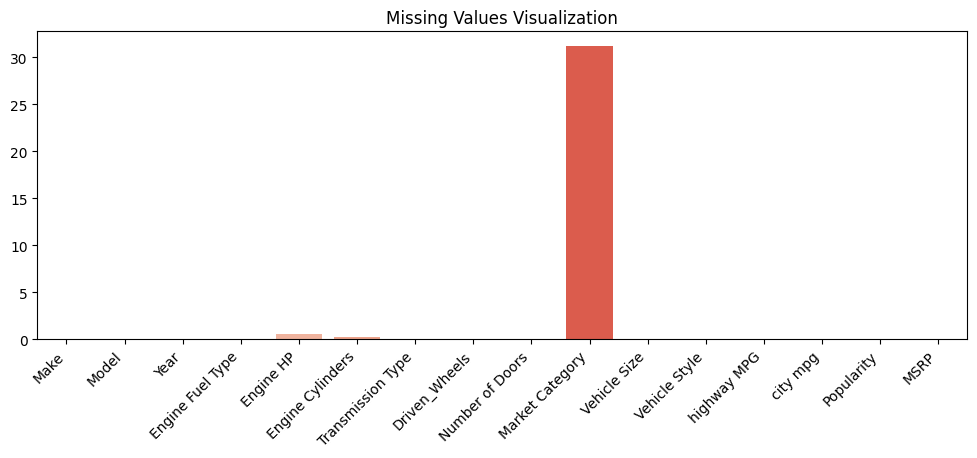

In [7]:
plt.figure(figsize=(12,4))
sns.barplot(data=missing_value_df, palette='Reds')
plt.title('Missing Values Visualization')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.show()

## Insights

- Among these, the missing values in the Market Category column are the highest, accounting for approximately 31.18%.



In [8]:
#Checking for various available columns 
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

### Dropping missing values

In [9]:
df.dropna(axis = 0 , inplace = True)

This process ensures that the dataset with null values are dropped which allows models to perform effectively without being influenced by missing records.

In [10]:
df.shape

(8170, 16)

##  Data Duplication handling

### Check for any duplicates in the entries

In [11]:
df.duplicated().sum()

435

- This shows 435 rows contain duplicates.


### Dropping duplicates

In [12]:

df = df.drop_duplicates()


- Duplicates need to be removed to avoid bias and incorrect statistical analysis and also to ensure accuracy in analysis and modeling.

## Null value handling

In [13]:
df.isnull().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

- As we have already handled missing values, this shows that there are no any missing values now.

## 5. Measure of central tendency and dispersion

In [ ]:
numerical_columns = ['Engine HP', 'Engine Cylinders', 'highway MPG', 'city mpg', 'MSRP']


central_tendency_dispersion = df[numerical_columns].agg(['mean', 'median', 'std', 'var', 'min', 'max'])

central_tendency_dispersion


,Engine HP,Engine Cylinders,highway MPG,city mpg,MSRP
mean,277.632062,5.825469,26.529800,19.468649,5.102826e+04
median,270.000000,6.000000,26.000000,18.000000,3.560000e+04
std,115.529955,1.895593,7.784920,7.231534,7.153777e+04
var,13347.170526,3.593274,60.604976,52.295080,5.117652e+09
min,55.000000,0.000000,12.000000,7.000000,2.000000e+03
max,1001.000000,16.000000,354.000000,137.000000,2.065902e+06


### Some analysis from the given data

- The Engine HP and MSRP columns have high variability, with outliers that influence their distributions.

- Fuel efficiency (both city and highway MPG) shows a fairly wide range where there are some cars being much more efficient than others.

- Engine Cylinders show a more uniform distribution, with a reasonable spread from 0 to 16.

- The average highway MPG efficiency is 26.53 MPG, but there is notable variation (std: 7.78). The maximum value of 354 MPG stands out as an outlier, suggesting there are some exceptionally fuel-efficient vehicles in the dataset.

In [15]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,7735.00000,7735.000000,7735.000000,7735.000000,7735.00000,7735.000000,7735.000000,7.735000e+03
mean,2012.14958,277.632062,5.825469,3.421332,26.52980,19.468649,1513.098772,5.102826e+04
std,6.23167,115.529955,1.895593,0.895054,7.78492,7.231534,1429.197317,7.153777e+04
min,1990.00000,55.000000,0.000000,2.000000,12.00000,7.000000,2.000000,2.000000e+03
25%,2010.00000,194.000000,4.000000,2.000000,22.00000,16.000000,520.000000,2.622500e+04
50%,2015.00000,270.000000,6.000000,4.000000,26.00000,18.000000,1013.000000,3.560000e+04
75%,2016.00000,325.000000,6.000000,4.000000,30.00000,22.000000,2009.000000,4.947750e+04
max,2017.00000,1001.000000,16.000000,4.000000,354.00000,137.000000,5657.000000,2.065902e+06


## Outlier detection and graphical presentation

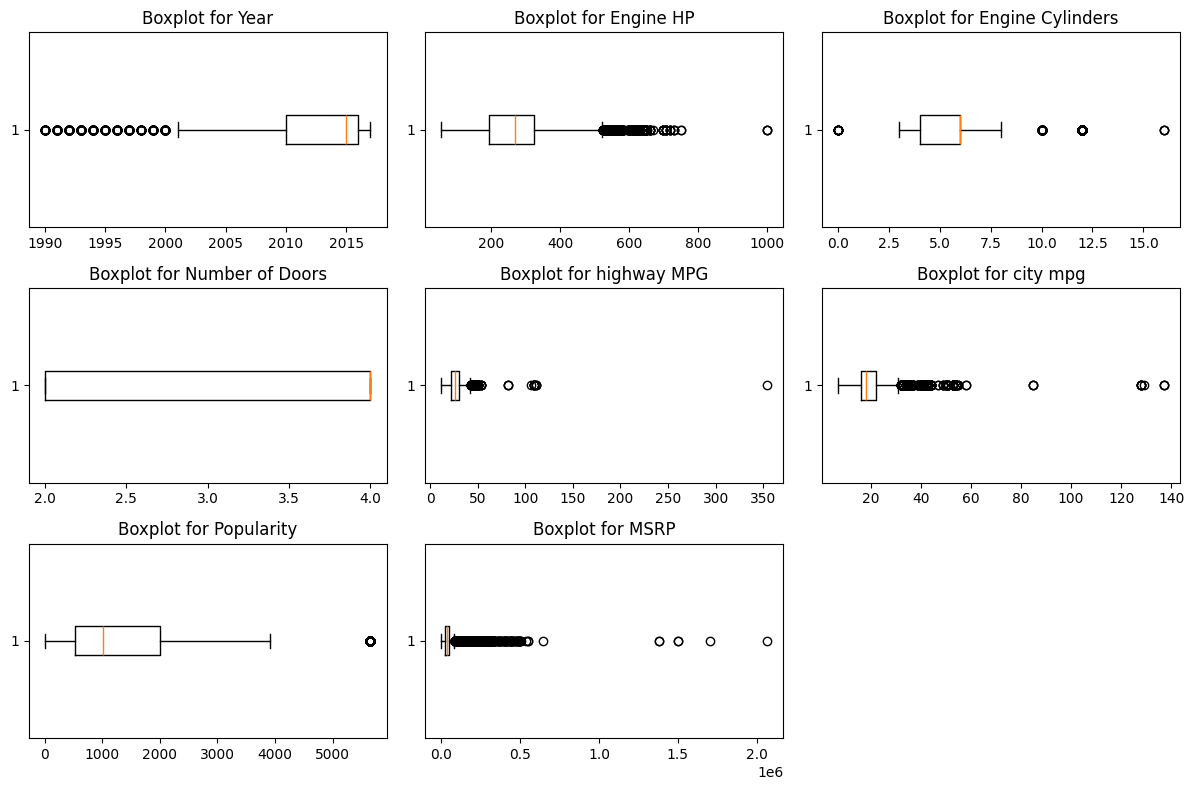

In [16]:
numeric_columns = df.select_dtypes(include=['number']).columns

plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    plt.boxplot(df[col], vert=False)
    plt.title(f'Boxplot for {col}')

plt.tight_layout()
plt.show()

### Analysis and Intrepretation from  these graphs 


- **Engine HP** shows a wide range with several extreme outliers, showing a few high-performance cars with much more horsepower than the majority.

- **Highway MPG** has a wide distribution with outliers on the higher side, showing cars with exceptional fuel efficiency for highway driving.

- **City MPG** follows a similar trend as highway MPG, with some cars showing very high fuel efficiency in urban driving conditions.

- **MSRP** shows significant variation, with a few premium cars priced much higher than most, suggesting both budget-friendly and luxury models in the dataset.

- **Number of Doors and Engine Cylinders** have little variation with most cars clustering around common values.This indicates consistency in these attributes across the dataset.



## Compare different features with respect to frequency counts

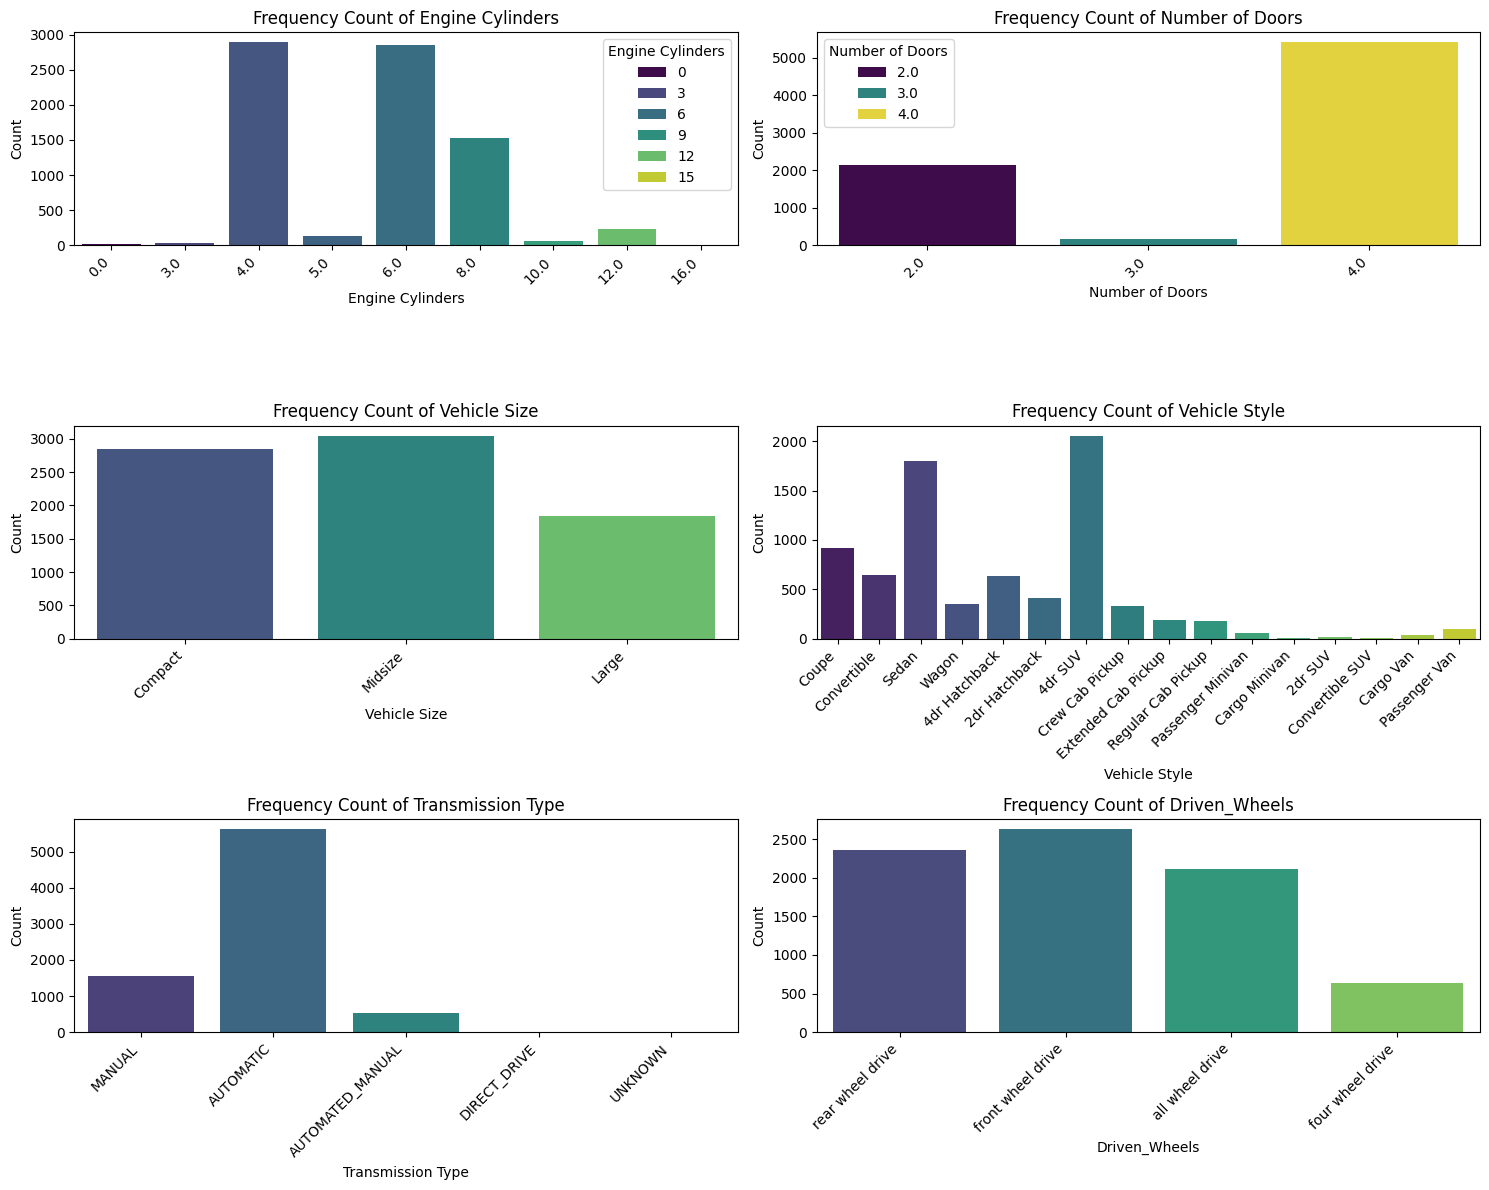

In [17]:
# selecting some important   columns for this
categorical_cols = ['Engine Cylinders', 'Number of Doors', 'Vehicle Size', 'Vehicle Style', 'Transmission Type', 'Driven_Wheels']

plt.figure(figsize=(15, 12))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 2, i)
    sns.countplot(x=df[col], hue=df[col], palette="viridis")
    plt.title(f"Frequency Count of {col}")
    plt.ylabel("Count")
    plt.xticks(rotation = 45, ha = 'right', fontsize = 10)
    
plt.tight_layout()
plt.show()

### Analysis and Intrepretation from these graphs 


- Most vehicles have four or six cylinders, indicating a balance between fuel efficiency and performance, while high-performance engines like 8, 10, 12 cylinders are rare.

- Four door vehicles dominate the dataset, suggesting that sedans and SUVs are the most common vehicle types.

- Compact and Midsize cars are the most popular, with Large vehicles appearing less frequently.

- Sedans, SUVs, and Pickup Trucks are the most common vehicle styles, reflecting their market demand.

- Automatic transmissions is  significantly more than manual ones, showing a shift in consumer preference.

- Front-wheel drive (FWD) and Rear-wheel drive (RWD) are the most common drivetrains, while All-wheel drive (AWD) and Four-wheel drive (4WD) are more specialized.

## 8. Histograms 

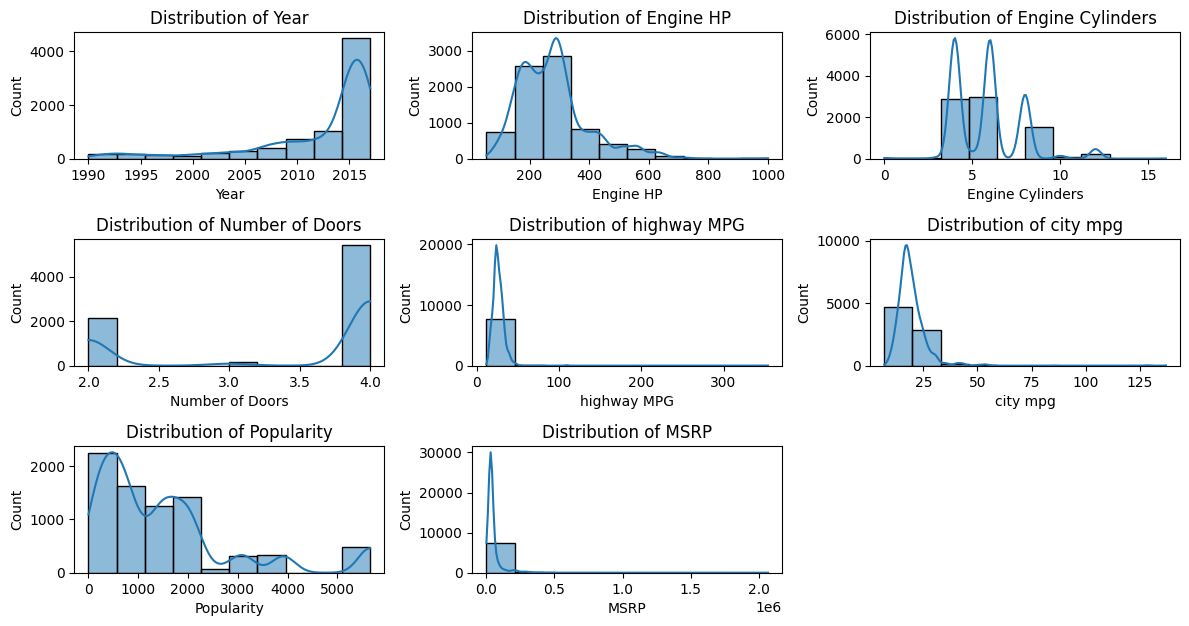

In [18]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(df.select_dtypes('number'), 1):# selecting numerical datatypes 
    plt.subplot(4, 3, i)
    sns.histplot(data = df[col], bins=10, kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

### Analysis and Intrepretation from these graphs


- The distribution of Year shows a significant concentration of vehicles from the years around 2015, with a large increase in counts, suggesting that newer car models dominate the dataset.

- The distribution of Engine HP reveals that most cars in the dataset have horsepower between 150-300 HP, with a few outliers showing cars with very high horsepower.

- The distribution of Popularity shows a wide range of values.This indicates that while some cars have very high popularity.

- The distribution of the Number of Doors clearly shows that most vehicles in the dataset have four doors, with only a small fraction of cars having two or three doors.This suggests that four-door cars are more common in the dataset.

- Both highway MPG and city mpg distributions show that most cars have lower fuel efficiency, with city MPG values typically below 30 and highway MPG values also concentrated below 40. This indicates that most cars have average to lower fuel efficiency, and only a few cars achieve high MPG ratings.

## 9.Scatter Plot for some features

### Scatter Plot between Engine HP vs MSRP

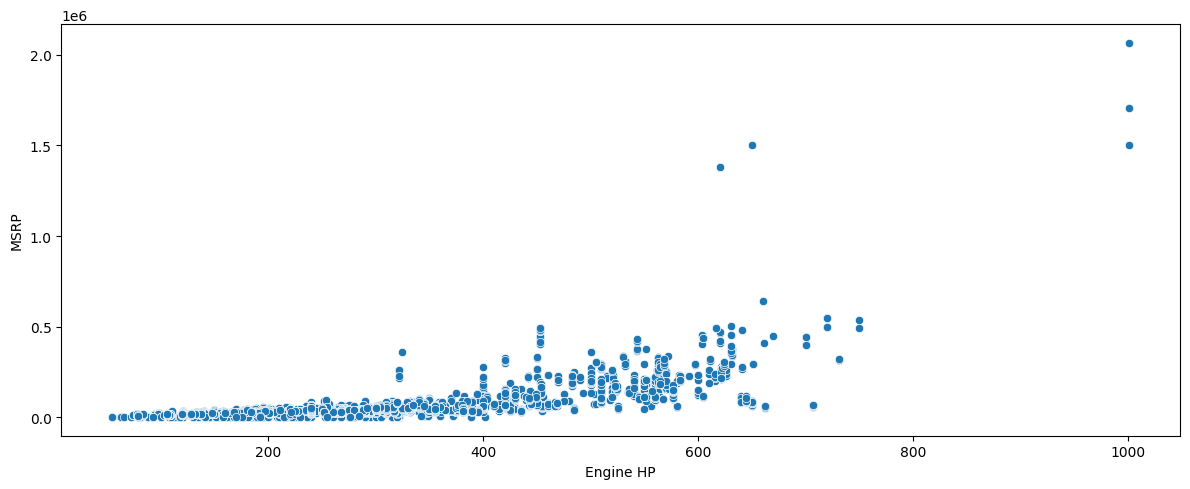

In [19]:
plt.figure(figsize = (12,5))
sns.scatterplot(x = df['Engine HP'], y = df['MSRP'])
plt.tight_layout()
plt.xlabel("Engine HP")
plt.show()

### Analysis and Intrepretation from this graph 


- There seems to be a **positive relation** for this graph.As Engine HP increases, there is a general upward trend in MSRP, indicating that cars with more horsepower tend to have a higher price.

- On concerning with **outliers**, there are a few data points with extremely high MSRP and Engine HP, suggesting that certain high-performance cars significantly deviate from the general trend.

### Scatter plot between Engine HP vs city mpg 

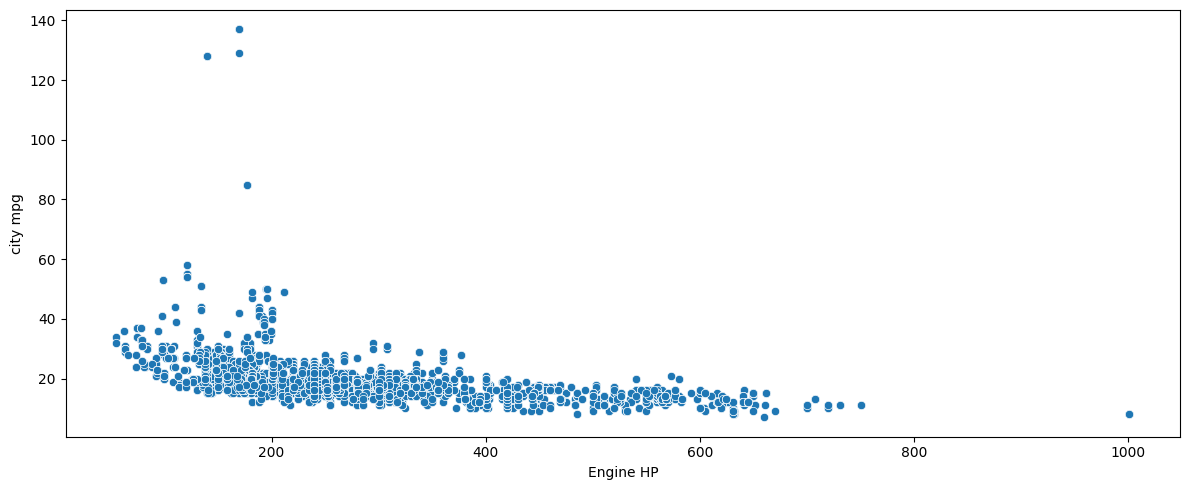

In [20]:
plt.figure(figsize = (12,5))
sns.scatterplot(x = df['Engine HP'], y = df['city mpg'])
plt.tight_layout()
plt.xlabel("Engine HP")
plt.show()

### Analysis and Intrepretation from this graph 


- There seems to be a negative relationship between Engine HP and City MPG. As Engine HP increases, the City MPG tends to decrease, which is typical as more powerful engines often consume more fuel in city driving conditions.

- There are a few outliers with extremely high Engine HP values which is close to 1000  but very low City MPG values.This might suggests that   some high performance cars with powerful engines have poor fuel efficiency in city conditions. 

## 10.Heat Map

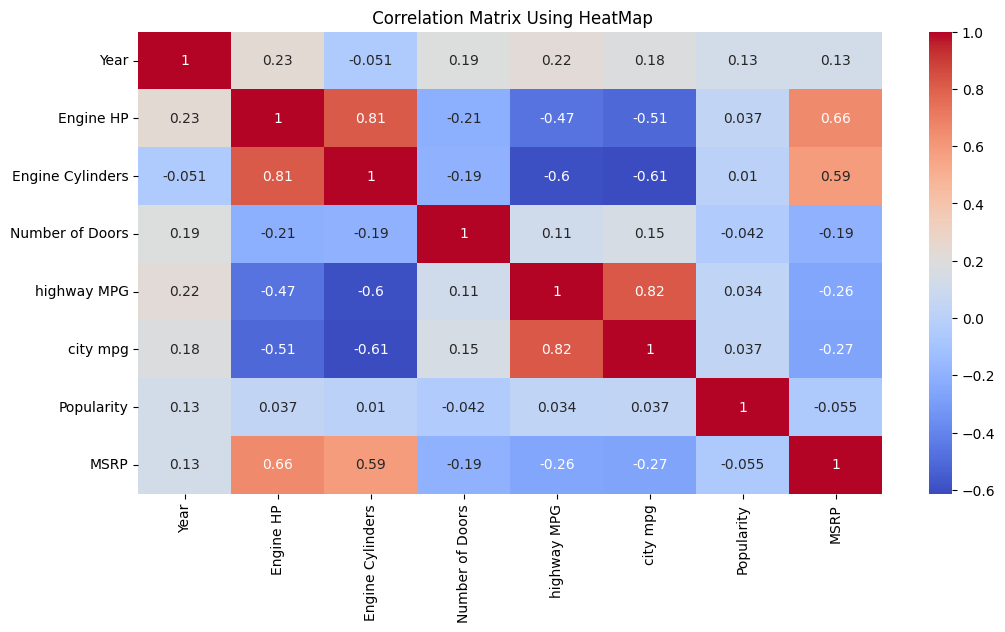

In [22]:
numerical_columns = df.select_dtypes('number').columns
plt.figure(figsize=(12, 6))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap="coolwarm")
plt.title(" Correlation Matrix Using HeatMap")
plt.show()


### Analysis and Intrepretation from this graph 


- Engine HP and Engine Cylinders have a high positive correlation (0.81). This indicates that cars with more cylinders tend to have more horsepower, which is typical for more powerful engines.

- Highway MPG and City MPG have a strong positive correlation (0.82), suggesting that cars with better fuel efficiency in the city also tend to perform well on the highway in terms of mileage.

- MSRP (price) has a positive correlation (0.66) with Engine HP, indicating that cars with higher horsepower tend to be more expensive, which aligns with the general trend that more powerful cars are priced higher.

- Both highway MPG (-0.47) and city MPG (-0.51) show a negative correlation with Engine HP, meaning that cars with higher horsepower tend to have lower fuel efficiency in both city and highway driving conditions.

- opularity has weak correlations with all other variables, suggesting that factors like engine specs or price (MSRP) are not strongly influenced by the car's popularity in the dataset.

## Box Plot for some features 

### Box plot for Engine HP

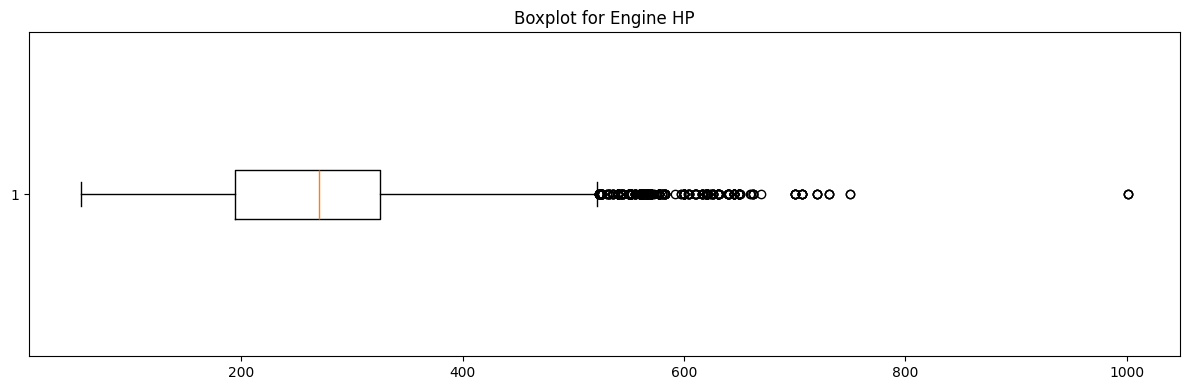

In [25]:
plt.figure(figsize=(12, 4))

plt.boxplot(df['Engine HP'], vert=False)
plt.title(f'Boxplot for Engine HP')
plt.tight_layout()
plt.show()

### Some insights from this graph 


- The boxplot shows several outliers where dots outside the whiskers.This indicates that there are a few cars with exceptionally high Engine HP compared to the majority of the vehicles in the dataset.

- The median Engine HP appears to be near the center of the interquartile range.This suggests that the distribution is relatively symmetrical. 

### Box Plot for MSRP

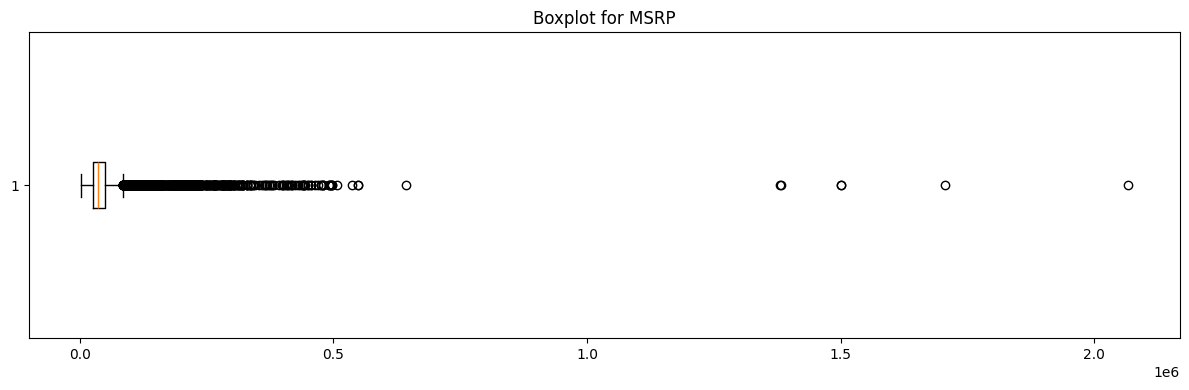

In [26]:
plt.figure(figsize=(12, 4))

plt.boxplot(df['MSRP'], vert=False)
plt.title(f'Boxplot for MSRP')
plt.tight_layout()
plt.show()

### Some insights from this graph 


- This boxplot shows several outliers where dots outside the whiskers. This suggests that there are a few cars with much higher MSRP compared to the majority of the vehicles in the dataset.

- The median MSRP is closer to the lower end of the range, which indicates that the distribution is right-skewed. 

- This means most cars have a lower MSRP, but a small number of cars with significantly higher prices are pulling the overall distribution towards the higher end.

### Box plot for city mpg

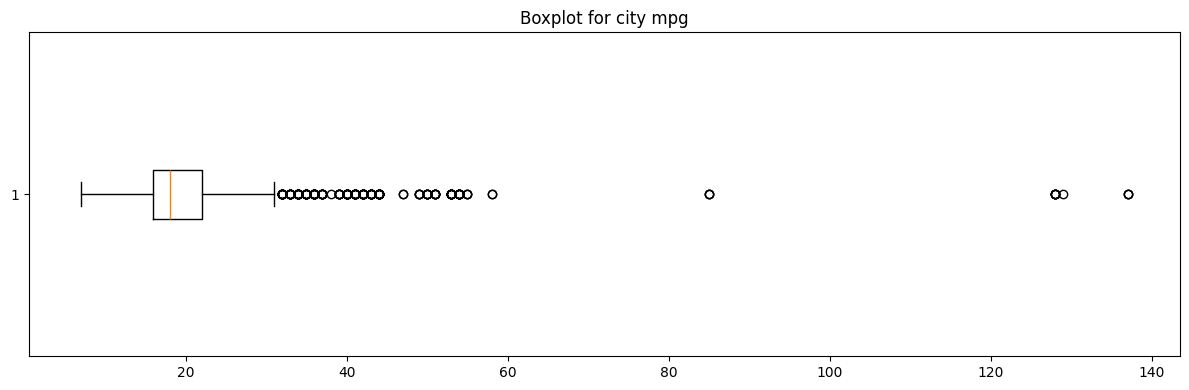

In [27]:
plt.figure(figsize=(12, 4))

plt.boxplot(df['city mpg'], vert=False)
plt.title(f'Boxplot for city mpg')
plt.tight_layout()
plt.show()

### Some insights from this graph 


- The boxplot shows several outliers where dots outside the whiskers.This indicates that a few vehicles have extremely high city MPG compared to the majority of the cars in the dataset.

- The median city MPG is closer to the lower end of the interquartile range.This suggests  that the distribution is right-skewed.
- This indicates that most cars have lower city mileage, with only a few cars achieving significantly higher fuel efficiency.